# Libraries

In this section we will import the libraries developed to simulate Adam, first-order and second-order integrodifferential Adam 

In [1]:
from optimizer.adam import grad_f, Adam, mse_loss, grad_mse
from IDE_Solver.idesolver import AdamIDE
import matplotlib.pyplot as plt
import numpy as np
import itertools
import time

# Settings:

In this section by specifying the setting used for the chosen example.

In [37]:
### Parameter grid
param_grid = {
    'lr': [0.1, 0.01],
    'beta1': [0.9, 0.5],
    'beta2': [0.99, 0.5],
}

n_learning_rates = len(param_grid['lr'])
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

### Initial values
np.random.seed(33)
theta_initial = np.random.uniform(2,3)
theta_initial_dot = np.random.uniform(2,3)
t_0 = 1e-12

### Simulation
example = 1
verbose = False

# Adam algorithm from scratch

In this section, we will implement Adam from zero to study the dynamics of this optimiser for different examples for different values of moments and learning rates.

Adam Configuration: {'lr': 0.1, 'beta1': 0.9, 'beta2': 0.99}

Final parameter value ADAM: theta = 4.0006, with elapsed time: 0.00 minutes.
Adam Configuration: {'lr': 0.1, 'beta1': 0.9, 'beta2': 0.5}

Final parameter value ADAM: theta = 3.9537, with elapsed time: 0.00 minutes.
Adam Configuration: {'lr': 0.1, 'beta1': 0.5, 'beta2': 0.99}

Final parameter value ADAM: theta = 4.0000, with elapsed time: 0.00 minutes.
Adam Configuration: {'lr': 0.1, 'beta1': 0.5, 'beta2': 0.5}

Final parameter value ADAM: theta = 4.0157, with elapsed time: 0.00 minutes.
Adam Configuration: {'lr': 0.01, 'beta1': 0.9, 'beta2': 0.99}

Final parameter value ADAM: theta = 3.9998, with elapsed time: 0.00 minutes.
Adam Configuration: {'lr': 0.01, 'beta1': 0.9, 'beta2': 0.5}

Final parameter value ADAM: theta = 4.0008, with elapsed time: 0.00 minutes.
Adam Configuration: {'lr': 0.01, 'beta1': 0.5, 'beta2': 0.99}

Final parameter value ADAM: theta = 3.9964, with elapsed time: 0.00 minutes.
Adam Configuration: {'lr': 

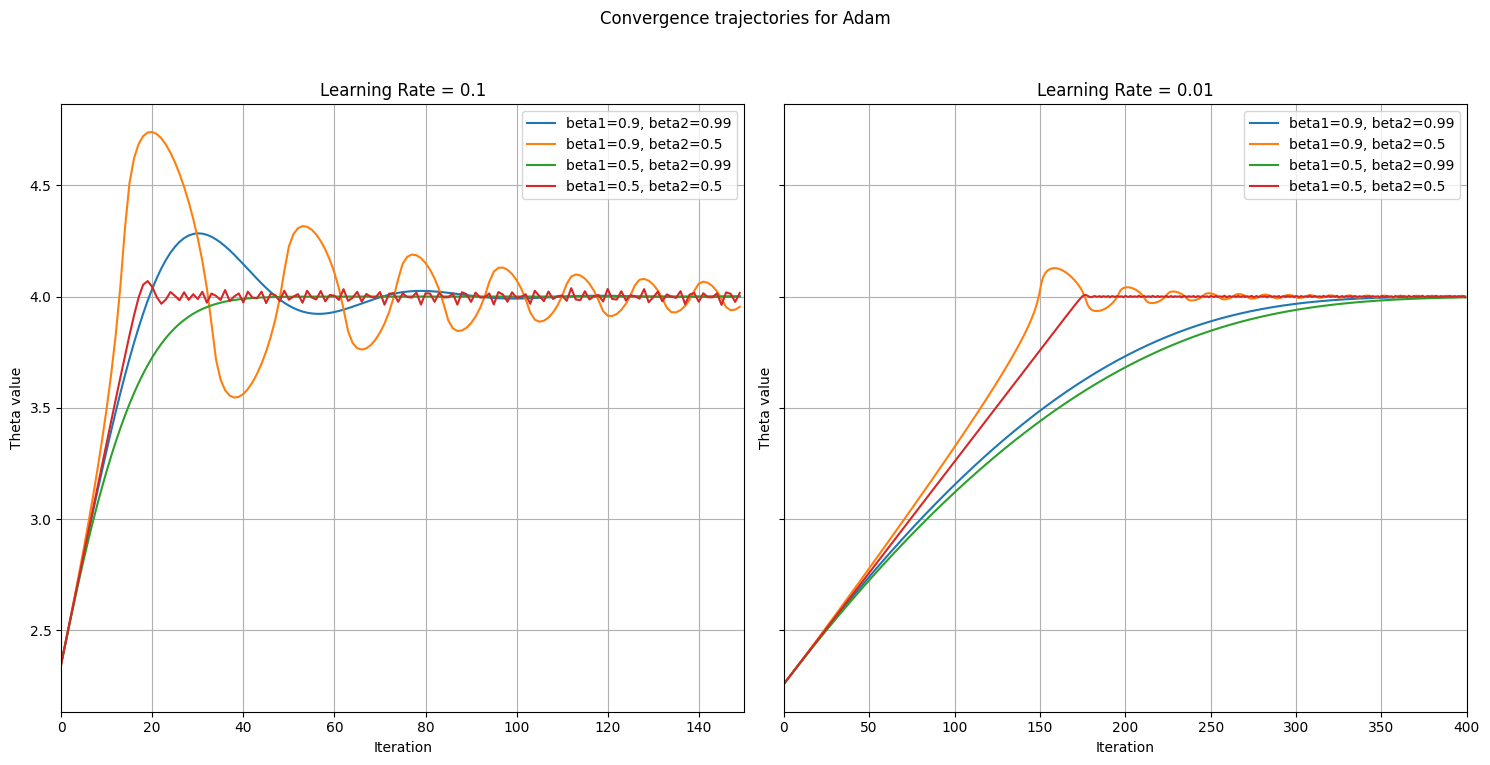

In [38]:
fig, axs = plt.subplots(ncols=n_learning_rates, figsize=(15, 8), sharey=True)    
fig.suptitle('Convergence trajectories for Adam')

x = np.arange(1,100+1, 1)
y_true = 2*x

for i, lr in enumerate(param_grid['lr']):

    ax = axs[i] if n_learning_rates > 1 else axs

    if example == 1:
        
        if lr == 0.1:
            epochs = 150
        elif lr == 0.01:
            epochs = 400

    elif example == 2:

        if lr == 0.1:
            epochs = 60
        elif lr == 0.01:
            epochs = 150

    for params in [p for p in all_params if p['lr'] == lr]:

        start_time =time.time()

        print(f'Adam Configuration: {params}')
        optimizer = Adam(**params)
        theta = theta_initial
        theta_result = []
        losses =[]
                
        for epoch in range(epochs):
            if example == 1:  
                grad = grad_f(theta)
            elif example == 2:
                y_pred = x * theta
                loss = mse_loss(y_true, y_pred)
                grad = grad_mse(theta, x, y_true)
                losses.append(loss)

            theta = optimizer.update(grad, theta)
            theta_result.append(theta)
            if epoch % 100 == 0 and verbose:
                print(f"Iteration {epoch}: theta = {theta}")

        if 'weight_decay' in params: 
            label = f"beta1={params['beta1']}, beta2={params['beta2']}, weight_decay={params['weight_decay']}, lambda_l2={params['lambda_l2']}"
        else:
            label = f"beta1={params['beta1']}, beta2={params['beta2']}"
            
        if example == 1:
            ax.plot(theta_result, label=label)
        elif example == 2:
            ax.plot(losses, label=label)
        ax.set_xlim([0, epochs])

        elapsed_time = (time.time() - start_time)/60
        print(f"\nFinal parameter value ADAM: theta = {theta:.4f}, with elapsed time: {elapsed_time:.2f} minutes.")

    ax.set_title(f'Learning Rate = {lr}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Theta value' if example == 1 else 'Loss')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# First-order nonlocal continuous Adam

In this section we will numerically simulate the first-order integrodifferential equation when we approximate Adam algoritm up to first order for the Learning Rate.


Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.9, 'beta2': 0.99}
Final parameter value ADAMIDE: theta = 4.0001, with elapsed time: 0.06 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.9, 'beta2': 0.5}
Final parameter value ADAMIDE: theta = 4.0000, with elapsed time: 0.10 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.5, 'beta2': 0.99}
Final parameter value ADAMIDE: theta = 3.9999, with elapsed time: 0.00 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.5, 'beta2': 0.5}
Final parameter value ADAMIDE: theta = 4.0000, with elapsed time: 0.02 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.01, 'beta1': 0.9, 'beta2': 0.99}
Final parameter value ADAMIDE: theta = 3.9999, with elapsed time: 0.05 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.01, 'beta1': 0.9, 'beta2': 0.5}
Final parameter value ADAMIDE: theta = 4.0000, with elapsed time: 0.33 minutes.

Nonlocal continuous Adam Con

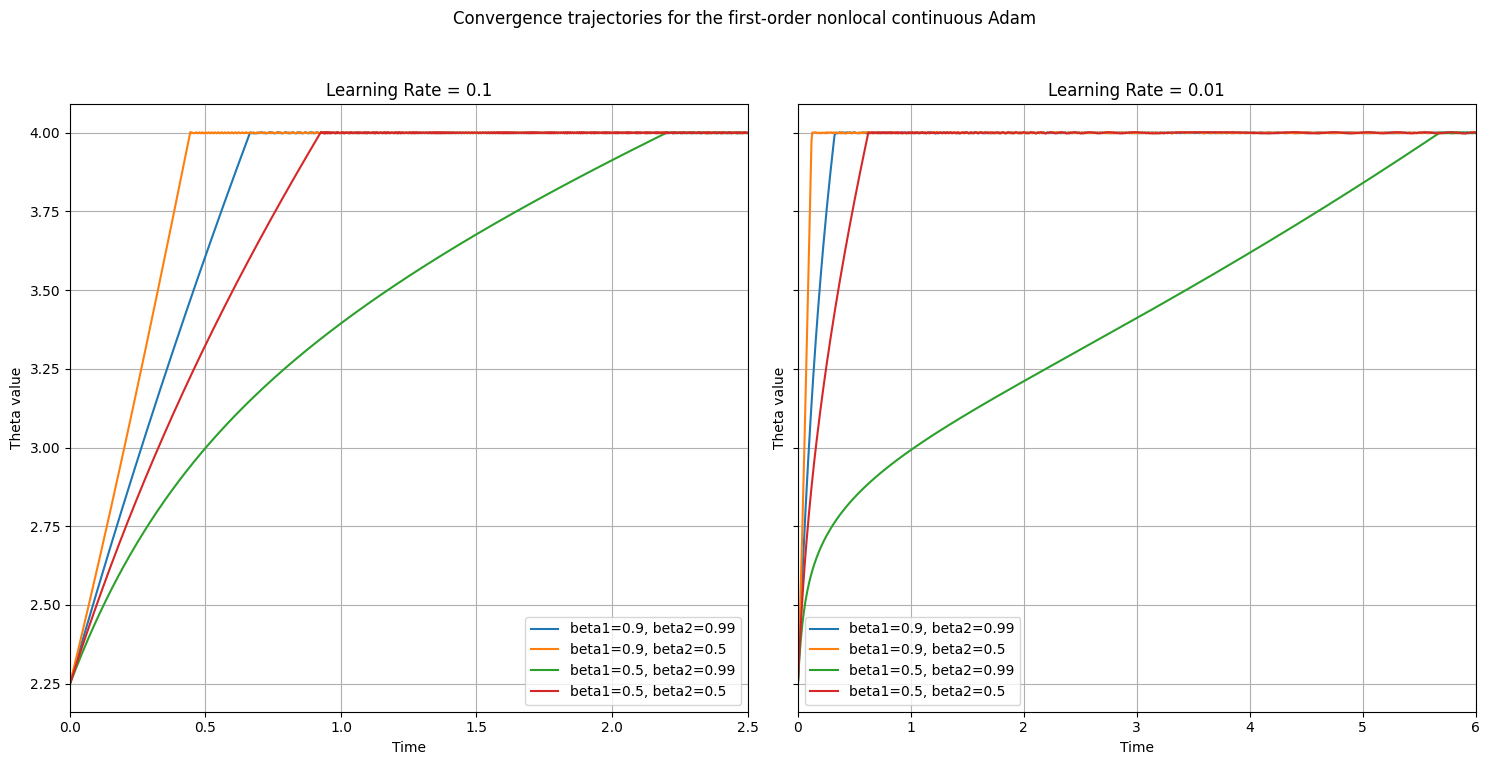

In [40]:
fig, axs = plt.subplots(ncols=n_learning_rates, figsize=(15, 8), sharex=False, sharey=True)   
fig.suptitle('Convergence trajectories for the first-order nonlocal continuous Adam')

y0 = [theta_initial] 
rtol = 1e-5
atol = 1e-7

for i, lr in enumerate(param_grid['lr']):
    
    ax = axs[i] if n_learning_rates > 1 else axs
    
    if example == 2:
        if lr == 0.1:
            t_max = 0.15
        elif lr == 0.01:
            t_max = 0.1
    elif example == 1:
        if lr == 0.1:
            t_max = 2.5
            #t_max = 1.0
        elif lr == 0.01:
            t_max = 6
            #t_max = 0.2

            

    filtered_params = [p for p in all_params if p['lr'] == lr]

    for params in filtered_params:

        start_time = time.time()

        print(f'\nNonlocal continuous Adam Configuration: {params}')

        optimizer = AdamIDE(second_order=False, t_max=t_max, t_0=t_0, alpha=lr, beta=[params['beta1'], params['beta2']], 
                            y0=y0, example=example, verbose=False, rtol=rtol, atol=atol)
        
        if example == 1:
            sol = optimizer.optimize()
        elif example == 2:
            sol, losses_IDE = optimizer.optimize_losses()

        elapsed_time = (time.time() - start_time)/60

        print(f"Final parameter value ADAMIDE: theta = {sol.y[0][-1]:.4f}, with elapsed time: {elapsed_time:.2f} minutes.")

        label = f"beta1={params['beta1']}, beta2={params['beta2']}"
        if example == 1:
            ax.plot(sol.t, sol.y[0], label=label)
            ax.set_ylabel('Theta value')
        elif example == 2:
            ax.plot(losses_IDE['Time'], losses_IDE['Loss'], label=label)
            ax.set_ylabel('Loss')
        ax.set_xlim([t_0, t_max])

        ax.set_xlim([0, t_max])
        ax.set_title(f'Learning Rate = {lr}')
        ax.set_xlabel('Time')
        ax.legend()
        ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Second-order nonlocal continuous Adam

In this section we will numerically simulate the second-order integrodifferential equation when we approximate Adam algoritm up to second order for the Learning Rate.


Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.9, 'beta2': 0.99}
Final parameter value ADAMIDE: theta = 3.9999, with elapsed time: 0.07 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.9, 'beta2': 0.5}
Final parameter value ADAMIDE: theta = 3.9999, with elapsed time: 0.10 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.5, 'beta2': 0.99}
Final parameter value ADAMIDE: theta = 3.9997, with elapsed time: 0.00 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.1, 'beta1': 0.5, 'beta2': 0.5}
Final parameter value ADAMIDE: theta = 3.9995, with elapsed time: 0.04 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.01, 'beta1': 0.9, 'beta2': 0.99}
Final parameter value ADAMIDE: theta = 3.4820, with elapsed time: 0.00 minutes.

Nonlocal continuous Adam Configuration: {'lr': 0.01, 'beta1': 0.9, 'beta2': 0.5}
Final parameter value ADAMIDE: theta = 4.0000, with elapsed time: 0.05 minutes.

Nonlocal continuous Adam Con

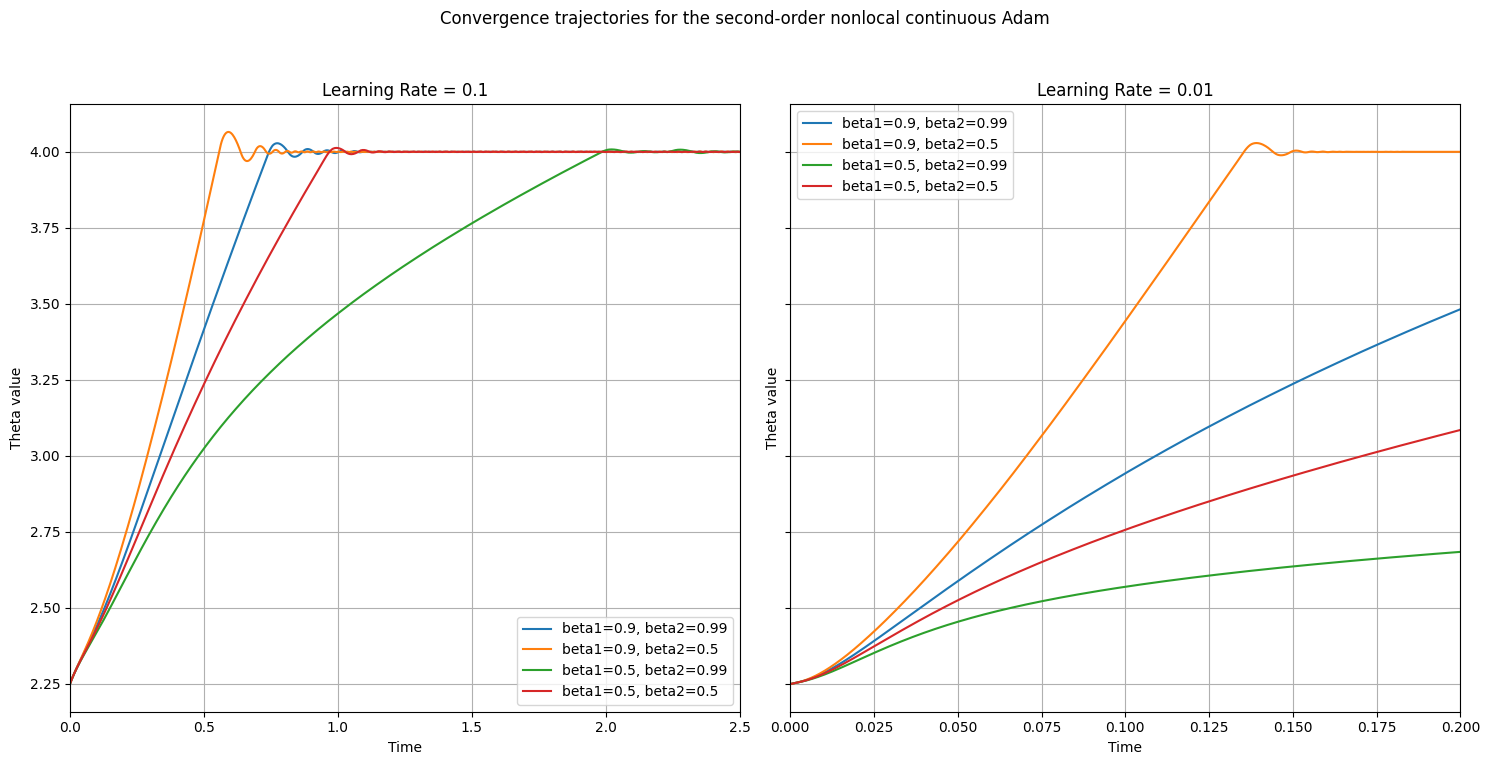

In [41]:
fig, axs = plt.subplots(ncols=n_learning_rates, figsize=(15, 8), sharex=False, sharey=True) 
fig.suptitle('Convergence trajectories for the second-order nonlocal continuous Adam')

y0 = [theta_initial,  theta_initial_dot]

rtol = 2.5e-3
atol = 1e-4

for i, lr in enumerate(param_grid['lr']):
    ax = axs[i] if n_learning_rates > 1 else axs
    filtered_params = [p for p in all_params if p['lr'] == lr]

    if example == 2:
        if lr == 0.1:
            t_max = 0.4
        elif lr == 0.01:
            t_max = 0.08
    elif example == 1:
        if lr == 0.1:
            t_max = 2.5
            #t_max = 1.2
        elif lr == 0.01:
            t_max = 0.2

    for params in filtered_params:

        start_time = time.time()

        print(f'\nNonlocal continuous Adam Configuration: {params}')

        optimizer = AdamIDE(second_order=True, t_max=t_max, t_0=t_0, alpha=lr, beta=[params['beta1'], params['beta2']], 
                             y0=y0, example=example,  rtol=rtol, atol=atol, verbose=verbose)
        
        if example == 1:
            sol = optimizer.optimize()
        elif example == 2:
            sol, losses_IDE = optimizer.optimize_losses()

        elapsed_time = (time.time() - start_time)/60

        print(f"Final parameter value ADAMIDE: theta = {sol.y[0][-1]:.4f}, with elapsed time: {elapsed_time:.2f} minutes.")

        label = f"beta1={params['beta1']}, beta2={params['beta2']}"
        if example == 1:
            ax.plot(sol.t, sol.y[0], label=label)
            ax.set_ylabel('Theta value')
        elif example == 2:
            ax.plot(losses_IDE['Time'], losses_IDE['Loss'], label=label)
            ax.set_ylabel('Loss')
        ax.set_xlim([t_0, t_max])
        ax.set_title(f'Learning Rate = {lr}')
        ax.set_xlabel('Time')
        ax.legend()
        ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()